# WeatherPy

### Observed Trends
* Temperature increases closer to equator.
* City latitude has little effect on humidity, except at the poles.
* Winds speeds tend to be greater further away from the equator. 

In [2]:
#import dependencies
import pandas as pd
import random
import requests
from citipy import citipy
import matplotlib.pyplot as plt
from pprint import pprint

#import OpenWeatherMap api key
from config import api_key

In [3]:
#create database to hold information from OpenWeatherMap
data = pd.DataFrame(columns =["Lat", "Long", "City", "Temperature", "Humidity",
                              "Clouds", "Wind Speed"])

#empty lists to append data to
lat = []
long = []

#for loop to generate random latitude and longitude cooridinates
for x in range(0,500):
    
    lat.append(random.uniform(-90,90))
    long.append(random.uniform(-180,180))
    
data["Lat"] = lat
data['Long'] = long

data.head()

,Lat,Long,City,Temperature,Humidity,Clouds,Wind Speed
0,36.840030,-138.326655,NaN,NaN,NaN,NaN,NaN
1,19.417284,-168.866576,NaN,NaN,NaN,NaN,NaN
2,-37.299821,-18.049731,NaN,NaN,NaN,NaN,NaN
3,79.278860,-83.418560,NaN,NaN,NaN,NaN,NaN
4,62.560630,147.222472,NaN,NaN,NaN,NaN,NaN


In [4]:
#use CitiPy library to find city near randomly generated cooridinates

cities = []

#use a for loop to iterate through the rows of the Data dataframe
for index, row in data.iterrows():
    
    city = citipy.nearest_city(row["Lat"], row["Long"])
    cities.append(city.city_name)
    
data["City"] = cities

data.head()

,Lat,Long,City,Temperature,Humidity,Clouds,Wind Speed
0,36.840030,-138.326655,fortuna,NaN,NaN,NaN,NaN
1,19.417284,-168.866576,kapaa,NaN,NaN,NaN,NaN
2,-37.299821,-18.049731,jamestown,NaN,NaN,NaN,NaN
3,79.278860,-83.418560,qaanaaq,NaN,NaN,NaN,NaN
4,62.560630,147.222472,myaundzha,NaN,NaN,NaN,NaN


In [5]:
#figure out how to remove and replace duplicates?

In [6]:
#set up API request
url = "https://api.openweathermap.org/data/2.5/weather?"
key = api_key
units = "imperial"

#lists to append to
temp = []
humidity = []
clouds = []
wind = []

counter = 0

#iterate through the rows to pull data from OpenWeatherMap

for index, row in data.iterrows():
    counter += 1
    city = row["City"]
    target_url = url + "lat=" + str(row["Lat"]) + "&lon=" + str(row["Long"]) +\
    "&appid="+ key + "&units=" + units
    print("This is request number "+ str(counter))
    print("The name of the city is "+ (row["City"]).upper())
    print(target_url)
    print("---------------------------------------")
    response = requests.get(target_url).json()
    temp.append(response["main"]["temp"])
    humidity.append(response["main"]["humidity"])
    clouds.append(response["clouds"]["all"])
    wind.append(response["wind"]["speed"])
       

#assign the values from the arrays to the data frame
data["Temperature"] = temp
data["Humidity"] = humidity
data["Clouds"] = clouds
data["Wind Speed"] = wind

This is request number 1
The name of the city is FORTUNA
https://api.openweathermap.org/data/2.5/weather?lat=36.84003020228995&lon=-138.32665499512603&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 2
The name of the city is KAPAA
https://api.openweathermap.org/data/2.5/weather?lat=19.417283807877823&lon=-168.86657590883217&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 3
The name of the city is JAMESTOWN
https://api.openweathermap.org/data/2.5/weather?lat=-37.299820801278116&lon=-18.049730955520886&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 4
The name of the city is QAANAAQ
https://api.openweathermap.org/data/2.5/weather?lat=79.27886035558458&lon=-83.41855985328722&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request nu

This is request number 35
The name of the city is KJOPSVIK
https://api.openweathermap.org/data/2.5/weather?lat=67.77873865611775&lon=16.788501207462133&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 36
The name of the city is CHAGDA
https://api.openweathermap.org/data/2.5/weather?lat=56.69551674752461&lon=128.51148372823678&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 37
The name of the city is USHUAIA
https://api.openweathermap.org/data/2.5/weather?lat=-89.77976372580186&lon=-74.43587864796861&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 38
The name of the city is MYS SHMIDTA
https://api.openweathermap.org/data/2.5/weather?lat=77.07817635796653&lon=-175.68906680792477&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is reques

This is request number 69
The name of the city is HOBART
https://api.openweathermap.org/data/2.5/weather?lat=-84.441426912647&lon=142.97757838198117&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 70
The name of the city is VAINI
https://api.openweathermap.org/data/2.5/weather?lat=-37.090525351859995&lon=-171.49749423001867&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 71
The name of the city is HASAKI
https://api.openweathermap.org/data/2.5/weather?lat=27.126916848092364&lon=160.14588503199417&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 72
The name of the city is ALBANY
https://api.openweathermap.org/data/2.5/weather?lat=-54.495672723029834&lon=114.12202017711206&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request numb

This is request number 103
The name of the city is BUTARITARI
https://api.openweathermap.org/data/2.5/weather?lat=24.60048207859913&lon=164.84259620554093&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 104
The name of the city is VAINI
https://api.openweathermap.org/data/2.5/weather?lat=-74.97869874728188&lon=-174.92703703072118&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 105
The name of the city is KASHAN
https://api.openweathermap.org/data/2.5/weather?lat=33.6570859972324&lon=51.22100789857774&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 106
The name of the city is CHANIKA
https://api.openweathermap.org/data/2.5/weather?lat=-5.622351561021858&lon=37.82290037477239&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request 

This is request number 136
The name of the city is MISRATAH
https://api.openweathermap.org/data/2.5/weather?lat=33.54785053922916&lon=15.894214805708032&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 137
The name of the city is DUJUMA
https://api.openweathermap.org/data/2.5/weather?lat=1.5396635850198237&lon=42.75256671265663&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 138
The name of the city is CASTRO
https://api.openweathermap.org/data/2.5/weather?lat=-48.523593895647856&lon=-94.1045737089507&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 139
The name of the city is PORT SHEPSTONE
https://api.openweathermap.org/data/2.5/weather?lat=-32.64656519299441&lon=33.532790664518274&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is 

This is request number 170
The name of the city is BANSWARA
https://api.openweathermap.org/data/2.5/weather?lat=23.673364940524735&lon=74.41615879746297&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 171
The name of the city is TASIILAQ
https://api.openweathermap.org/data/2.5/weather?lat=61.669040918461576&lon=-37.73192551683118&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 172
The name of the city is PUERTO AYORA
https://api.openweathermap.org/data/2.5/weather?lat=-5.091305342681636&lon=-108.94885917326728&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 173
The name of the city is RIBEIRA GRANDE
https://api.openweathermap.org/data/2.5/weather?lat=35.733707926077756&lon=-41.45464998341987&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
--------------------------------------

This is request number 203
The name of the city is RIKITEA
https://api.openweathermap.org/data/2.5/weather?lat=-23.60444576635642&lon=-124.4264287364276&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 204
The name of the city is BREDASDORP
https://api.openweathermap.org/data/2.5/weather?lat=-78.59005610474112&lon=14.830952300054179&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 205
The name of the city is FORTUNA
https://api.openweathermap.org/data/2.5/weather?lat=33.658794300889085&lon=-135.96678962351498&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 206
The name of the city is CARNARVON
https://api.openweathermap.org/data/2.5/weather?lat=-28.0733351807389&lon=107.66431444848229&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is

This is request number 236
The name of the city is SANTA MARIA
https://api.openweathermap.org/data/2.5/weather?lat=20.178010094113986&lon=-21.176978087352865&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 237
The name of the city is KHATANGA
https://api.openweathermap.org/data/2.5/weather?lat=89.35138584906906&lon=102.49802148337812&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 238
The name of the city is KLAKSVIK
https://api.openweathermap.org/data/2.5/weather?lat=73.44483539774069&lon=-5.881664683345235&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 239
The name of the city is HIRARA
https://api.openweathermap.org/data/2.5/weather?lat=23.06257209251966&lon=125.35403256196247&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is r

This is request number 270
The name of the city is KLOULKLUBED
https://api.openweathermap.org/data/2.5/weather?lat=7.3327478454055495&lon=133.20821612389676&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 271
The name of the city is BUSSELTON
https://api.openweathermap.org/data/2.5/weather?lat=-33.43729289188785&lon=113.23638192174701&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 272
The name of the city is BUD
https://api.openweathermap.org/data/2.5/weather?lat=63.37642565256499&lon=7.039981490439828&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 273
The name of the city is TURUKHANSK
https://api.openweathermap.org/data/2.5/weather?lat=64.15330052878932&lon=91.30058786476462&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is req

This is request number 303
The name of the city is MARIDI
https://api.openweathermap.org/data/2.5/weather?lat=4.5947953572120355&lon=30.02532059514425&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 304
The name of the city is COAHUAYANA
https://api.openweathermap.org/data/2.5/weather?lat=10.393338981380666&lon=-107.51999955643113&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 305
The name of the city is CASTRO
https://api.openweathermap.org/data/2.5/weather?lat=-46.010379558919674&lon=-106.54656813757782&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 306
The name of the city is MATAURA
https://api.openweathermap.org/data/2.5/weather?lat=-42.139337376764246&lon=-152.3432733297011&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is 

This is request number 337
The name of the city is UMZIMVUBU
https://api.openweathermap.org/data/2.5/weather?lat=-37.91751303172858&lon=33.72681877085728&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 338
The name of the city is KAMENKA
https://api.openweathermap.org/data/2.5/weather?lat=69.98858673634655&lon=45.48598086578917&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 339
The name of the city is USHUAIA
https://api.openweathermap.org/data/2.5/weather?lat=-70.40573401909049&lon=-52.8533436234071&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 340
The name of the city is KAPAA
https://api.openweathermap.org/data/2.5/weather?lat=34.04774736259698&lon=-159.94905283264987&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request 

This is request number 371
The name of the city is FORTUNA
https://api.openweathermap.org/data/2.5/weather?lat=35.416608656218074&lon=-132.02649255260144&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 372
The name of the city is HARWICH
https://api.openweathermap.org/data/2.5/weather?lat=41.615730560547235&lon=-68.47925662744412&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 373
The name of the city is HILO
https://api.openweathermap.org/data/2.5/weather?lat=12.729020105167933&lon=-136.0931460514696&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 374
The name of the city is JAMESTOWN
https://api.openweathermap.org/data/2.5/weather?lat=-35.508557782999254&lon=-11.251314848283641&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is re

This is request number 405
The name of the city is RIKITEA
https://api.openweathermap.org/data/2.5/weather?lat=-46.63574756902742&lon=-124.44401491904543&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 406
The name of the city is TASIILAQ
https://api.openweathermap.org/data/2.5/weather?lat=79.15316950091574&lon=-35.13775933389584&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 407
The name of the city is OSTROVNOY
https://api.openweathermap.org/data/2.5/weather?lat=77.93660175497445&lon=43.509298261053914&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 408
The name of the city is NHULUNBUY
https://api.openweathermap.org/data/2.5/weather?lat=-11.929637812404223&lon=136.84524671747653&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is

This is request number 438
The name of the city is ELAT
https://api.openweathermap.org/data/2.5/weather?lat=29.212830484132184&lon=34.126479624668775&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 439
The name of the city is VAINI
https://api.openweathermap.org/data/2.5/weather?lat=-86.57098544721947&lon=-175.5857737105819&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 440
The name of the city is TASIILAQ
https://api.openweathermap.org/data/2.5/weather?lat=87.10803879351138&lon=-36.67761936157541&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 441
The name of the city is OSTROVNOY
https://api.openweathermap.org/data/2.5/weather?lat=75.8777421312125&lon=39.98207124722066&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request nu

This is request number 472
The name of the city is AVARUA
https://api.openweathermap.org/data/2.5/weather?lat=-56.46267994664945&lon=-163.17985642544755&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 473
The name of the city is PORTLAND
https://api.openweathermap.org/data/2.5/weather?lat=-53.22031035791668&lon=133.116195829815&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 474
The name of the city is XAM NUA
https://api.openweathermap.org/data/2.5/weather?lat=20.919217711523757&lon=104.31621949993018&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is request number 475
The name of the city is LOMPOC
https://api.openweathermap.org/data/2.5/weather?lat=30.372272678047537&lon=-126.43948113416538&appid=dc420b4243492d00f3e5909765aa462e&units=imperial
---------------------------------------
This is reque

In [7]:
#display DataFrame with data gathered from OpenWeatherMap
data.head()

,Lat,Long,City,Temperature,Humidity,Clouds,Wind Speed
0,36.840030,-138.326655,fortuna,54.40,100,92,22.73
1,19.417284,-168.866576,kapaa,76.45,100,56,18.81
2,-37.299821,-18.049731,jamestown,69.07,98,92,7.18
3,79.278860,-83.418560,qaanaaq,-30.20,49,24,2.15
4,62.560630,147.222472,myaundzha,-7.07,68,64,3.15


### DataFrame Ouput

In [9]:
# Save the DataFrame as a csv
data.to_csv("output_analysis/city_weather_data.csv", encoding="utf-8", index=False)

### Latitude vs Temperature Plot

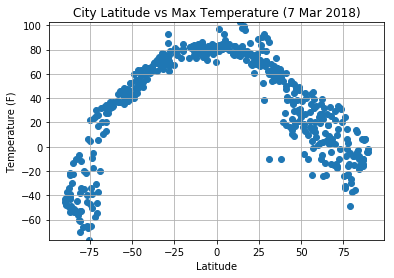

In [14]:
plt.scatter(data["Lat"], data["Temperature"], marker = "o")
plt.title("City Latitude vs Max Temperature (7 Mar 2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.xlim(-99, 99 )
plt.ylim(min(data["Temperature"]), max(data["Temperature"]))

plt.savefig("output_analysis/latitdue_temperature_plot.png")

plt.show()

### Latitude vs Humidity Plot

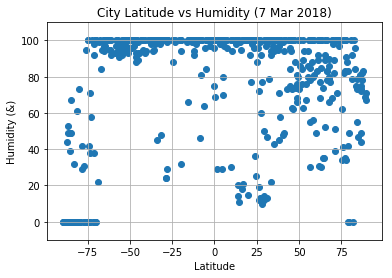

In [15]:
plt.scatter(data["Lat"], data["Humidity"], marker = "o")
plt.title("City Latitude vs Humidity (7 Mar 2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (&)")
plt.grid()
plt.xlim(-99, 99 )
plt.ylim(-10, 110)

plt.savefig("output_analysis/latitdue_humidity_plot.png")

plt.show()

### Latitude vs Cloudiness Plot

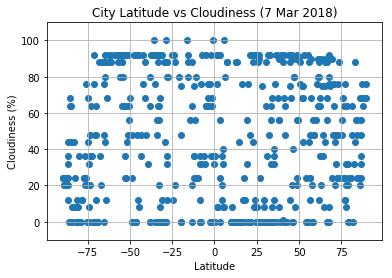

In [16]:
plt.scatter(data["Lat"], data["Clouds"], marker = "o")
plt.title("City Latitude vs Cloudiness (7 Mar 2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.xlim(-99, 99 )
plt.ylim(-10, 110)

plt.savefig("output_analysis/latitdue_cloudiness_plot.png")

plt.show()

### Latitude vs Wind Speed Plot

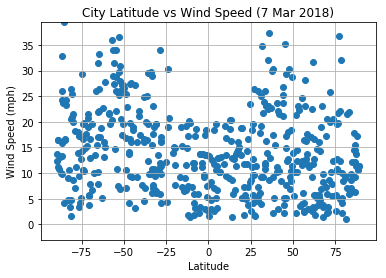

In [17]:
plt.scatter(data["Lat"], data["Wind Speed"], marker = "o")
plt.title("City Latitude vs Wind Speed (7 Mar 2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.xlim(-99, 99 )
plt.ylim(-3, max(data["Wind Speed"]))

plt.savefig("output_analysis/latitdue_wind_plot.png")

plt.show()